In [218]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
import random
import sklearn as sk
from sklearn.preprocessing import LabelEncoder

In [219]:
laliga_df = pd.read_csv('https://www.football-data.co.uk/mmz4281/2021/SP1.csv')

In [220]:
laliga_df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,12/09/2020,15:00,Eibar,Celta,0,0,D,0,0,...,1.51,0.00,1.94,1.96,1.96,1.96,1.98,2.01,1.92,1.96
1,SP1,12/09/2020,17:30,Granada,Ath Bilbao,2,0,H,0,0,...,1.38,0.00,1.74,2.19,1.77,2.20,1.93,2.23,1.78,2.11
2,SP1,12/09/2020,20:00,Cadiz,Osasuna,0,2,A,0,1,...,1.36,0.25,1.72,2.07,1.79,2.17,1.81,2.25,1.74,2.17
3,SP1,13/09/2020,13:00,Alaves,Betis,0,1,A,0,0,...,1.61,0.25,1.93,1.97,1.93,2.00,1.95,2.05,1.88,1.99
4,SP1,13/09/2020,15:00,Valladolid,Sociedad,1,1,D,1,0,...,1.40,0.00,2.07,1.83,2.13,1.82,2.13,1.88,2.06,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,22/05/2021,17:00,Osasuna,Sociedad,0,1,A,0,0,...,2.34,1.00,2.07,1.86,2.06,1.87,2.07,1.96,1.98,1.88
376,SP1,22/05/2021,17:00,Real Madrid,Villarreal,2,1,H,0,1,...,2.57,-1.00,2.01,1.92,2.00,1.93,2.02,2.02,1.95,1.92
377,SP1,22/05/2021,17:00,Valladolid,Ath Madrid,1,2,A,1,0,...,2.30,1.50,1.90,2.03,1.90,2.02,1.95,2.06,1.90,1.97
378,SP1,23/05/2021,17:30,Granada,Getafe,0,0,D,0,0,...,1.80,0.25,1.73,2.08,1.77,2.18,1.84,2.23,1.77,2.12


In [221]:
table = laliga_df[20:39]

In [222]:
tmp_table1 = table['HomeTeam']
tmp_table2 = table['AwayTeam']
newlaliga = pd.concat([tmp_table1, tmp_table2], ignore_index=True)
newlaliga = pd.DataFrame(newlaliga, columns = ['Team'])

In [223]:
newlaliga = pd.DataFrame(newlaliga, columns = ['Team', 'Points'])
newlaliga['Points'] = 0

In [224]:
newlaliga = newlaliga.drop_duplicates(ignore_index=True)
newlaliga

,Team,Points
0,Ath Madrid,0
1,Cadiz,0
2,Valladolid,0
3,Barcelona,0
4,Sociedad,0
5,Getafe,0
6,Huesca,0
7,Villarreal,0
8,Eibar,0
9,Real Madrid,0


In [29]:
le_ftr = LabelEncoder()
le_htr = LabelEncoder()
laliga_df['FTR'] = le_ftr.fit_transform(laliga_df['FTR'])
laliga_df['HTR'] = le_ftr.fit_transform(laliga_df['HTR'])
laliga_df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,12/09/2020,15:00,Eibar,Celta,0,0,1,0,0,...,1.51,0.00,1.94,1.96,1.96,1.96,1.98,2.01,1.92,1.96
1,SP1,12/09/2020,17:30,Granada,Ath Bilbao,2,0,2,0,0,...,1.38,0.00,1.74,2.19,1.77,2.20,1.93,2.23,1.78,2.11
2,SP1,12/09/2020,20:00,Cadiz,Osasuna,0,2,0,0,1,...,1.36,0.25,1.72,2.07,1.79,2.17,1.81,2.25,1.74,2.17
3,SP1,13/09/2020,13:00,Alaves,Betis,0,1,0,0,0,...,1.61,0.25,1.93,1.97,1.93,2.00,1.95,2.05,1.88,1.99
4,SP1,13/09/2020,15:00,Valladolid,Sociedad,1,1,1,1,0,...,1.40,0.00,2.07,1.83,2.13,1.82,2.13,1.88,2.06,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,22/05/2021,17:00,Osasuna,Sociedad,0,1,0,0,0,...,2.34,1.00,2.07,1.86,2.06,1.87,2.07,1.96,1.98,1.88
376,SP1,22/05/2021,17:00,Real Madrid,Villarreal,2,1,2,0,1,...,2.57,-1.00,2.01,1.92,2.00,1.93,2.02,2.02,1.95,1.92
377,SP1,22/05/2021,17:00,Valladolid,Ath Madrid,1,2,0,1,0,...,2.30,1.50,1.90,2.03,1.90,2.02,1.95,2.06,1.90,1.97
378,SP1,23/05/2021,17:30,Granada,Getafe,0,0,1,0,0,...,1.80,0.25,1.73,2.08,1.77,2.18,1.84,2.23,1.77,2.12


In [225]:
num_fields = ['FTHG', 'FTAG','HTHG', 'HTAG', 'HS', 'AS', 'HST', 
            'AST', 'HF', 'AF', 'HC', 'AC','HY', 'AY', 'HR', 'AR']

str_fields = ['FTR', 'HTR']

bet_fields = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
            'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH',
            'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365CH', 'B365CD', 
            'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD','IWCA', 'PSCH', 
            'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD',
            'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA']

def count_coef(x_train):
    res_coef = [0] * 16
    wins_coef = [0, 0, 0]
    
    for i in range(0, len(x_train)):
        coef = []
        total_actions = 0
        played_game = x_train.iloc[i]
        for j in num_fields:
            total_actions += played_game[num_fields.index(j)]
        
        for k in num_fields:
            if played_game[num_fields.index(k)] != 0:
                efficiency = total_actions / played_game[num_fields.index(k)]
            else:
                efficiency = total_actions
                
            coef.append(efficiency)
        
        for k in str_fields:
            if k == 'FTR':
                if played_game[k] == 'H':
                    wins_coef[0] += 1
                elif played_game[k] == 'A':
                    wins_coef[1] += 1
                else:
                    wins_coef[2] += 1
                    
        res_coef = [x+y for x, y in zip(res_coef, coef)]
    
    wins_coef = [x/len(x_train) for x in wins_coef]
    res_coef = [x/(len(x_train)*len(x_train)) for x in res_coef]
    
    for idx in [8, 9, 12, 13, 14, 15]:
        res_coef[idx] *= -1
            
    return res_coef, wins_coef

def count_points(played_game, coef):
    points_home = 0
    points_away = 0
    coef_idx = 0
    average_home, average_away = 0, 0
    
    for i in num_fields:
        if num_fields.index(i)%2 == 0:
            points_home += played_game[i].item() * coef[coef_idx]
            if num_fields.index(i) < 4:
                points_away -= 1.1 * played_game[i].item() * coef[coef_idx]
        else:
            points_away += played_game[i].item() * coef[coef_idx]
            if num_fields.index(i) < 4:
                points_away -= 1.1 * played_game[i].item() * coef[coef_idx]
            
        coef_idx += 1
        
#     for i in str_fields:
#             if i == 'FTR':
#                 if played_game[i] == 'H': # если домашняя победа
#                     points_home += 5
# #                     points_away -= 5
#                 elif played_game[i] == 'A':
# #                     points_home -= 6
#                     points_away += 6
#                 else:
#                     points_home += 1
#                     points_away += 1
    
#     for i in bet_fields:
#         if bet_fields.index(i)%3 == 0:
#             average_home += played_game[i].item()
#         elif bet_fields.index(i)%3 == 1:
#             average_home += played_game[i].item()
#             average_away += played_game[i].item()
#         else:
#             average_away += played_game[i].item()
    
#     points_home += 1 / (average_home / len(bet_fields))
#     points_away += 1 / (average_away / len(bet_fields))
    print(points_home, points_away, played_game['FTR'])
    return points_home, points_away

In [226]:
x_games.iloc[0]['FTR']

KeyError: 'FTR'

In [227]:
newlaliga['Points'] = 0

In [228]:
idx = random.randint(0, 280)
games_for_train = laliga_df[idx:idx+100]
# games_for_train

In [229]:
y_games = games_for_train[['FTR']]
x_games = games_for_train.drop(['FTR', 'HTR'], axis=1)
x_games = x_games.iloc[:, 5:]
x_games

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
208,2,2,0,2,8,9,2,4,17,5,...,1.85,1.25,1.89,2.04,1.90,2.03,1.92,2.07,1.84,2.03
209,3,0,0,0,17,5,5,1,10,11,...,1.50,-0.75,2.11,1.82,2.15,1.79,2.16,1.93,2.05,1.82
210,4,1,2,0,17,2,6,1,7,7,...,1.79,-1.25,1.98,1.95,1.97,1.95,2.00,1.98,1.92,1.93
211,1,1,1,0,11,15,2,2,10,8,...,1.63,-0.25,2.09,1.84,2.08,1.85,2.11,1.87,2.04,1.83
212,2,1,1,1,12,12,4,3,10,11,...,1.54,0.00,1.87,2.06,1.87,2.06,1.88,2.11,1.84,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,5,0,2,0,10,0,7,0,10,10,...,1.67,-1.25,2.03,1.90,2.04,1.89,2.07,2.01,2.00,1.87
304,2,2,2,1,9,9,5,3,12,10,...,2.30,-0.50,1.86,2.04,1.89,2.04,1.92,2.08,1.85,2.03
305,0,0,0,0,5,11,2,4,6,13,...,1.75,0.50,1.88,2.05,1.88,2.04,1.90,2.10,1.84,2.05
306,0,0,0,0,19,10,6,2,17,8,...,1.85,0.50,1.88,2.05,1.89,2.03,1.90,2.07,1.87,2.00


In [230]:
# for i in range(0, 100):
result = games_for_train.iloc[0]['FTR']
coef, wins_coef = count_coef(x_games)
coef, wins_coef

KeyError: 'FTR'

In [209]:
for i in range(0, len(laliga_df)):
    points_home, points_away = count_points(laliga_df.iloc[i], coef)
    newlaliga.loc[newlaliga[newlaliga['Team'] == laliga_df.iloc[i]['HomeTeam']].index, 'Points'] += points_home
    newlaliga.loc[newlaliga[newlaliga['Team'] == laliga_df.iloc[i]['AwayTeam']].index, 'Points'] += points_away

-1.6411210773478186 -0.12326235394664731 D
0.581756309612337 -1.493001406417945 H
1.6727770850381345 0.01934930822030867 A
0.3377302560536959 0.992707993654455 A
1.4951521188829706 -0.7223884956988991 D
3.364742282875194 0.9347737037002269 D
6.6620341523811355 -1.1074401141162917 H
4.663137758184927 0.6523797923221913 H
-0.266258879255439 -0.13574625433006138 H
4.8451831254212445 0.09102324807181927 H
-1.3966536769806157 -0.7683341974556231 A
4.365324881184645 -1.1203069056409447 H
3.8940965677246497 -1.6169958522033039 H
-0.7872118299380213 4.098924042565927 D
-0.5805727323895618 1.9620407423245563 D
2.384172238740212 0.7796098047286052 D
-0.39569462192525917 6.206308749356471 A
3.798086298573006 -1.3893305375953338 A
2.104887875908453 1.7882077285936524 A
1.4133622265483536 1.8396285664276009 A
6.165920964255545 -2.759044993391643 H
2.2586792539367857 1.662005260197476 A
0.7368820679281072 -2.41306063907237 D
10.199190249908908 -4.646568545717071 H
2.654863284962016 0.166661010683155

4.808738591520744 -0.7148891353501124 H
1.7582246052600938 1.8470846192254333 D
2.3455291433248355 -0.9455128845369942 D
-1.526562419886952 1.5865423110942352 A
-0.3578862907557294 -0.8779527766318127 A
2.180542179185828 -2.7988468268397786 H
0.38386912443516863 -1.0005900347224492 D
1.0312110232454792 2.2602467885313597 A
3.1699927596460338 -0.01644692040952167 H
3.9788413197341486 0.04171668613511348 A
5.820052759883006 0.5313034954485919 D
3.153317191642261 0.024885881556464096 H
2.122461566647221 -2.509446663450372 H
1.43798790531801 0.7207462297964704 H
1.0350796898439643 2.167566760078108 H
2.107192718752284 2.3364060406140608 A
7.2251305907148105 -2.0140437803082945 A
0.5807387367585779 3.267394136297154 D
6.33915184699562 -0.8152841008738576 H
3.847437913318023 1.050920335112282 H
7.950438017482339 -2.477289163091773 H
3.78453090314232 -1.6697286577231945 H
1.4903497324121666 -1.3357684338326197 H
0.047387828794329456 -0.5149831720668577 D
4.034275819911885 -1.5437589307904784 

In [210]:
newlaliga = newlaliga.sort_values(by='Points', ascending=False, ignore_index=True)
newlaliga

,Team,Points
0,Barcelona,141.561185
1,Real Madrid,111.984999
2,Ath Madrid,92.278299
3,Sociedad,75.580933
4,Villarreal,65.565646
5,Ath Bilbao,63.384739
6,Sevilla,61.310871
7,Levante,51.742352
8,Betis,50.768731
9,Valencia,46.479586


In [73]:
x_games

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
2,0,2,0,1,12,6,3,4,14,21,...,1.36,0.25,1.72,2.07,1.79,2.17,1.81,2.25,1.74,2.17
3,0,1,0,0,7,11,2,4,19,17,...,1.61,0.25,1.93,1.97,1.93,2.00,1.95,2.05,1.88,1.99
4,1,1,1,0,8,8,3,2,15,17,...,1.40,0.00,2.07,1.83,2.13,1.82,2.13,1.88,2.06,1.82
5,1,1,0,1,15,10,4,3,10,22,...,1.97,-1.00,1.95,1.95,1.94,1.98,2.00,1.99,1.93,1.94
6,4,2,2,2,14,19,8,8,9,14,...,1.80,-0.25,2.09,1.81,2.10,1.84,2.18,1.85,2.08,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,2,0,1,20,11,9,6,8,17,...,2.44,-1.50,1.94,1.96,1.93,1.99,1.97,2.07,1.89,1.97
98,4,0,2,0,20,10,11,5,8,12,...,2.95,-1.75,1.98,1.92,1.99,1.91,2.01,2.05,1.91,1.94
99,1,1,0,1,11,5,3,2,16,23,...,1.38,0.00,1.79,2.11,1.83,2.11,1.88,2.14,1.81,2.07
100,3,1,1,1,17,9,8,2,14,13,...,1.60,-0.50,1.92,1.98,1.93,2.00,2.01,2.00,1.95,1.91


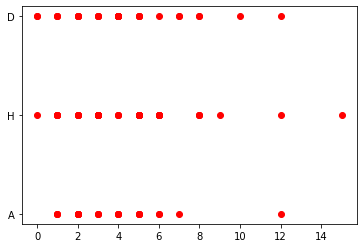

In [24]:
plt.plot(x_games.iloc[:,10], y_games.iloc[:,0], 'ro')